In [ ]:
# import pickle

# # Đọc mô hình từ tệp tin
# with open('logistic_regression_model.pkl', 'rb') as file:
#     loaded_model = pickle.load(file)

In [1]:
import os
import numpy as np
import pandas as pd
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.datasets import make_classification

In [2]:
import os
for dirname, _, filenames in os.walk('D:\Work_space\MachineLearning\DemoWeather\dataset'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

D:\Work_space\MachineLearning\DemoWeather\dataset\cloudy\cloudy1.jpg
D:\Work_space\MachineLearning\DemoWeather\dataset\cloudy\cloudy10.jpg
D:\Work_space\MachineLearning\DemoWeather\dataset\cloudy\cloudy100.jpg
D:\Work_space\MachineLearning\DemoWeather\dataset\cloudy\cloudy101.jpg
D:\Work_space\MachineLearning\DemoWeather\dataset\cloudy\cloudy102.jpg
D:\Work_space\MachineLearning\DemoWeather\dataset\cloudy\cloudy103.jpg
D:\Work_space\MachineLearning\DemoWeather\dataset\cloudy\cloudy104.jpg
D:\Work_space\MachineLearning\DemoWeather\dataset\cloudy\cloudy105.jpg
D:\Work_space\MachineLearning\DemoWeather\dataset\cloudy\cloudy106.jpg
D:\Work_space\MachineLearning\DemoWeather\dataset\cloudy\cloudy107.jpg
D:\Work_space\MachineLearning\DemoWeather\dataset\cloudy\cloudy108.jpg
D:\Work_space\MachineLearning\DemoWeather\dataset\cloudy\cloudy109.jpg
D:\Work_space\MachineLearning\DemoWeather\dataset\cloudy\cloudy11.jpg
D:\Work_space\MachineLearning\DemoWeather\dataset\cloudy\cloudy110.jpg
D:\Work_sp

In [3]:
foggy = "D:\Work_space\MachineLearning\DemoWeather\dataset/foggy"
sunrise = "D:\Work_space\MachineLearning\DemoWeather\dataset/sunrise"
shine = "D:\Work_space\MachineLearning\DemoWeather\dataset/shine"
rainy = "D:\Work_space\MachineLearning\DemoWeather\dataset/rainy"
cloudy = "D:\Work_space\MachineLearning\DemoWeather\dataset/cloudy"
test = "D:\Work_space\MachineLearning\DemoWeather\dataset/alien_test"

In [4]:
os.listdir("D:\Work_space\MachineLearning\DemoWeather\dataset")
print("Number of Images in Each Directory:")
print(f"Foggy: {len(os.listdir(foggy))}")
print(f"Sunrise: {len(os.listdir(sunrise))}")
print(f"Shine: {len(os.listdir(shine))}")
print(f"Rainy: {len(os.listdir(rainy))}")
print(f"Cloudy: {len(os.listdir(cloudy))}")

Number of Images in Each Directory:
Foggy: 300
Sunrise: 350
Shine: 250
Rainy: 300
Cloudy: 300


In [5]:
def load_images(path):
    imgs = []
    label = []
    l1 = os.listdir(path)
    for i in l1:
        l2 = os.listdir(path+'/'+i)
        for j in l2:
            img = Image.open(path + i + '/'+j).convert('RGB')
            img = img.resize(size=(150,150))
            imgs.append(np.array(img))
            label.append(i)
            del img
    return np.array(imgs),label


In [8]:
data, labels = load_images("D:/Work_space/MachineLearning/DemoWeather/dataset/")

In [9]:
label_encoder = LabelEncoder()
encoded_labels = label_encoder.fit_transform(labels)

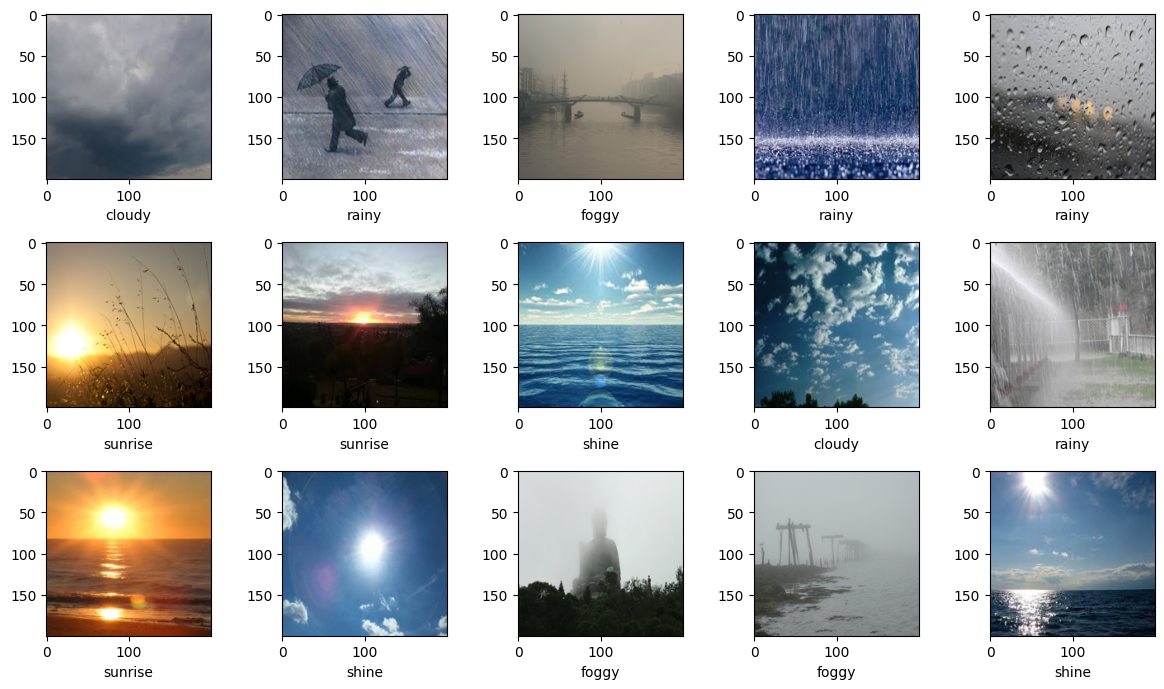

In [10]:
import random
fig = plt.figure(figsize=(12,7))
for i in range(15):
    sample =  random.choice(range(len(data)))
    image = data[sample]
    category = labels[sample]
    plt.subplot(3,5,i+1)
    plt.subplots_adjust(hspace=0.3)
    plt.imshow(image)
    plt.xlabel(category)

plt.tight_layout()
plt.show()

In [11]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.applications import VGG16 # type: ignore
from tensorflow.keras.applications.vgg16 import preprocess_input  # type: ignore
vgg_model = VGG16(weights='imagenet', include_top=False, input_shape=(150, 150, 3))

58889256/58889256 ━━━━━━━━━━━━━━━━━━━━ 6s 0us/step


In [12]:
data_preprocessed = preprocess_input(data)

In [14]:
import tensorflow as tf
data_preprocessed = tf.image.resize(data_preprocessed, (150, 150))

In [15]:
features = vgg_model.predict(data_preprocessed)

47/47 ━━━━━━━━━━━━━━━━━━━━ 151s 3s/step


In [28]:
X_train, X_test, y_train, y_test = train_test_split(features, encoded_labels, test_size=0.2, random_state=42)

In [29]:
print(X_train.shape)

(1200, 4, 4, 512)


In [42]:
X_train = X_train.reshape(X_train.shape[0], -1)
X_test = X_test.reshape(X_test.shape[0], -1)

In [37]:
print(X_train.shape)

(1200, 8192)


In [38]:
vgg_model.summary()

Model: "vgg16"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 150, 150, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv1 (Conv2D)           │ (None, 150, 150, 64)   │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_conv2 (Conv2D)           │ (None, 150, 150, 64)   │        36,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block1_pool (MaxPooling2D)      │ (None, 75, 75, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv1 (Conv2D)           │ (None, 75, 75, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_conv2 (Conv2D)           │ (None, 75, 75, 128)    │       147,584 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block2_pool (MaxPooling2D)      │ (None, 37, 37, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv1 (Conv2D)           │ (None, 37, 37, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv2 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_conv3 (Conv2D)           │ (None, 37, 37, 256)    │       590,080 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block3_pool (MaxPooling2D)      │ (None, 18, 18, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv1 (Conv2D)           │ (None, 18, 18, 512)    │     1,180,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv2 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_conv3 (Conv2D)           │ (None, 18, 18, 512)    │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block4_pool (MaxPooling2D)      │ (None, 9, 9, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv1 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv2 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_conv3 (Conv2D)           │ (None, 9, 9, 512)      │     2,359,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ block5_pool (MaxPooling2D)      │ (None, 4, 4, 512)      │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 14,714,688 (56.13 MB)

 Trainable params: 14,714,688 (56.13 MB)

 Non-trainable params: 0 (0.00 B)

In [39]:
logistic_model = LogisticRegression(max_iter=1000)

In [40]:
logistic_model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [43]:
y_pred = logistic_model.predict(X_test)

In [44]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

Accuracy: 0.9333333333333333


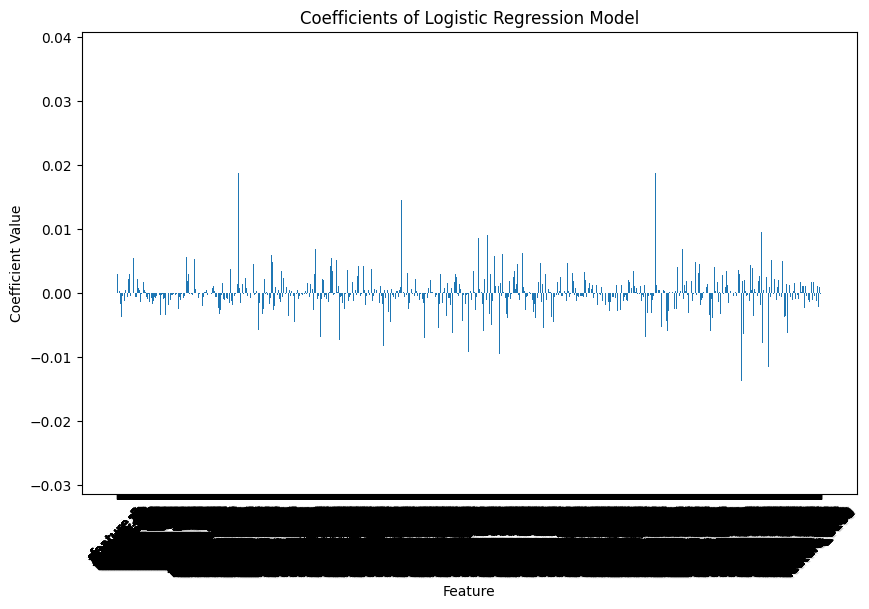

In [45]:
import matplotlib.pyplot as plt

# Lấy các hệ số của mô hình Logistic Regression
coefficients = logistic_model.coef_[0]

# Tạo tên của các đặc trưng
feature_names = ['feature_{}'.format(i) for i in range(len(coefficients))]

# Vẽ biểu đồ của các hệ số
plt.figure(figsize=(10, 6))
plt.bar(feature_names, coefficients)
plt.title("Coefficients of Logistic Regression Model")
plt.xlabel("Feature")
plt.ylabel("Coefficient Value")
plt.xticks(rotation=45)
plt.show()

In [46]:
def preprocess_image(image_path):
    # Đọc hình ảnh và chuyển đổi thành mảng numpy
    img = Image.open(image_path).convert('RGB')
    # Resize hình ảnh thành kích thước phù hợp với mô hình (ở đây là 200x200)
    img = img.resize((200, 200))
    # Chuyển đổi hình ảnh thành định dạng phù hợp để đưa vào mô hình
    img_array = np.array(img)
    img_array = np.expand_dims(img_array, axis=0)  # Thêm một chiều cho batch
    img_array = preprocess_input(img_array)
    return img_array

In [47]:
def predict_image(model, image_path):
    # Tiền xử lý hình ảnh
    preprocessed_image = preprocess_image(image_path)
    # Dự đoán nhãn của hình ảnh
    prediction = model.predict(preprocessed_image)
    # Trả về nhãn được dự đoán
    return prediction

In [52]:
# import pickle

# # Lưu mô hình
# with open('logistic_regression_model.pkl', 'wb') as file:
#     pickle.dump(logistic_model, file)